PROBLEM   STATEMENT
Explanation: The dataset shows the results of an experiment that has 3 components – a set of classifiers,  features sets and blocks of time. Various combinations of these 3 factors give different ranking of F1 and MCC scores.
The dataset contains: 
●	A total of nine classifiers (C) - C1 to C9.
●	Five time segments (T) i.e., 2 min, 5 min, 10 min, 15 min and 30 min.
●	Three feature set (S) - A, B, C 
●	Scores : F1, Recall, Precision & MCC

In [ ]:
#https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/#:~:text=Analysis%20of%20variance%20(ANOVA)%20is,the%20means%20of%20different%20samples.

In [30]:
# Here we are importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
path="https://raw.githubusercontent.com/Ashutoshrx/hackathon/main/dataset/Scores%20Dataset.csv"

In [32]:
# Reading the dataset from csv file and showing sample data
data=pd.read_csv(path)
data.head(10)

,C,T,S,F1,Recall,Precision,MCC
0,C1,2min,A,0.886354,0.919236,0.871495,0.919236
1,C2,2min,A,0.883949,0.911894,0.886433,0.911894
2,C3,2min,A,0.971346,0.970631,0.973364,0.970631
3,C4,2min,A,0.781009,0.726872,0.858229,0.726872
4,C5,2min,A,0.901466,0.922173,0.913166,0.922173
5,C6,2min,A,0.984601,0.985316,0.985549,0.985316
6,C7,2min,A,0.875758,0.908957,0.876829,0.908957
7,C8,2min,A,0.987578,0.988253,0.988402,0.988253
8,C9,2min,A,0.977391,0.977974,0.977442,0.977974
9,C1,5min,A,0.824859,0.876652,0.795108,0.876652


In [33]:
# Here we are getting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C          135 non-null    object 
 1   T          135 non-null    object 
 2   S          135 non-null    object 
 3   F1         135 non-null    float64
 4   Recall     135 non-null    float64
 5   Precision  135 non-null    float64
 6   MCC        135 non-null    float64
dtypes: float64(4), object(3)
memory usage: 7.5+ KB


1.	Identify the best combinations of the 3 factors on the basis of the scores

To solve this question we take the mean of F1, Recall and Precision. And we select best combination corresponding to the highest mean.

In [34]:
X=data.drop(['C','T','S','MCC'], axis=1)
X=pd.DataFrame(X)
Mean=X.mean(axis=1)
maxi=Mean.max()
pos=Mean.idxmax()
print("Maximum mean is", maxi, "in the position", pos)

Maximum mean is 0.9880777813333333 in the position 7


In [35]:
data['Mean']=X.mean(axis=1)

Since we get maximum mean as 0.9880777813333333 in the position 7,
we can say that best combination of three factors is C(C8), T(2min), S(A)

2.	Rank the best combination of C, T & S based on F1 and MCC

To solve this problem we calculate the mean of F1 and MCC and we rank the best combinations based on highest mean to the lowest.

In [36]:
data.sort_values("Mean", ascending=False)

,C,T,S,F1,Recall,Precision,MCC,Mean
7,C8,2min,A,0.987578,0.988253,0.988402,0.988253,0.988078
52,C8,2min,B,0.987578,0.988253,0.988402,0.988253,0.988078
95,C6,2min,C,0.984820,0.985790,0.986002,0.985790,0.985538
97,C8,2min,C,0.984820,0.985790,0.986002,0.985790,0.985538
50,C6,2min,B,0.984601,0.985316,0.985549,0.985316,0.985155
...,...,...,...,...,...,...,...,...
111,C4,10min,C,0.486285,0.369449,0.795755,0.369449,0.550497
36,C1,30min,A,0.509108,0.565345,0.534798,0.565345,0.536417
93,C4,2min,C,0.402377,0.277087,0.900812,0.277087,0.526759
84,C4,30min,B,0.403961,0.437592,0.578747,0.437592,0.473433


In [37]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Data=data.drop(['MCC'], axis=1)
Data.head()
model=ols("Mean~C+T+S", Data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     53.14
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.37e-44
Time:                        14:06:03   Log-Likelihood:                 205.44
No. Observations:                 135   AIC:                            -380.9
Df Residuals:                     120   BIC:                            -337.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7122      0.019     38.131      0.0

In [38]:
anova=anova_lm(model)
print(anova)

             df    sum_sq   mean_sq          F        PR(>F)
C           8.0  1.921582  0.240198  76.505221  1.772408e-43
T           4.0  0.363592  0.090898  28.951844  7.607740e-17
S           2.0  0.050684  0.025342   8.071648  5.141610e-04
Residual  120.0  0.376755  0.003140        NaN           NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


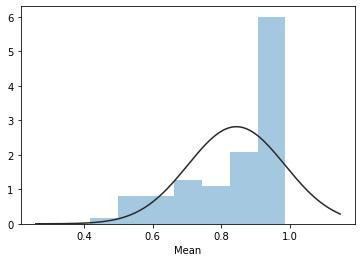

In [39]:
import scipy as sp
sns.distplot(data['Mean'], fit=sp.stats.norm, kde=False)
plt.show()

In [40]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=data['Mean'], groups=data['C'], alpha=0.05)
print(tukey)
tukey1=pairwise_tukeyhsd(endog=data['Mean'], groups=data['T'], alpha=0.05)
print(tukey1)
tukey2=pairwise_tukeyhsd(endog=data['Mean'], groups=data['S'], alpha=0.05)
print(tukey2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    C1     C2    0.082 0.1161 -0.0093  0.1733  False
    C1     C3   0.2122  0.001  0.1209  0.3035   True
    C1     C4   -0.137  0.001 -0.2283 -0.0457   True
    C1     C5   0.0874 0.0723 -0.0039  0.1788  False
    C1     C6   0.2271  0.001  0.1358  0.3184   True
    C1     C7   0.0247    0.9 -0.0666   0.116  False
    C1     C8   0.2291  0.001  0.1378  0.3205   True
    C1     C9   0.2022  0.001  0.1109  0.2935   True
    C2     C3   0.1302  0.001  0.0389  0.2215   True
    C2     C4   -0.219  0.001 -0.3104 -0.1277   True
    C2     C5   0.0054    0.9 -0.0859  0.0968  False
    C2     C6   0.1451  0.001  0.0538  0.2364   True
    C2     C7  -0.0573 0.5512 -0.1486   0.034  False
    C2     C8   0.1471  0.001  0.0558  0.2384   True
    C2     C9   0.1202 0.0019  0.0288  0.2115   True
    C3     C4  -0.3492  0.001 -0.4405 -0.2579 

In [41]:
pip install bioinfokit

In [42]:
import bioinfokit
from bioinfokit.analys import stat
res=stat()
res.tukey_hsd(data, res_var='Mean', xfac_var=['C', 'T', 'S'], anova_model='Mean~C+T+S')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(C1, 2min, A)","(C1, 2min, B)",0.006727,-0.355980,0.369434,0.120051,0.9
1,"(C1, 2min, A)","(C1, 2min, C)",0.042496,-0.320211,0.405204,0.758426,0.9
2,"(C1, 2min, A)","(C1, 5min, A)",0.060156,-0.302552,0.422863,1.073587,0.9
3,"(C1, 2min, A)","(C1, 5min, B)",0.064998,-0.297709,0.427705,1.160007,0.9
4,"(C1, 2min, A)","(C1, 5min, C)",0.039382,-0.323325,0.402089,0.702846,0.9
...,...,...,...,...,...,...,...
9040,"(C9, 15min, C)","(C9, 30min, B)",0.031001,-0.331706,0.393708,0.553272,0.9
9041,"(C9, 15min, C)","(C9, 30min, C)",0.004480,-0.358227,0.367187,0.079948,0.9
9042,"(C9, 30min, A)","(C9, 30min, B)",0.055943,-0.306764,0.418650,0.998404,0.9
9043,"(C9, 30min, A)","(C9, 30min, C)",0.082464,-0.280243,0.445172,1.471728,0.9


In [43]:
min(res.tukey_summary['p-value'])

0.001

In [44]:
print(res.tukey_summary[res.tukey_summary['p-value'] == res.tukey_summary['p-value'].min()])

              group1          group2      Diff  ...     Upper   q-value  p-value
56     (C1, 2min, A)  (C4, 30min, A)  0.474562  ...  0.837269  8.469420    0.001
189    (C1, 2min, B)  (C4, 30min, A)  0.467835  ...  0.830542  8.349369    0.001
321    (C1, 2min, C)  (C4, 30min, A)  0.517058  ...  0.879765  9.227846    0.001
322    (C1, 2min, C)  (C4, 30min, B)  0.461425  ...  0.824132  8.234975    0.001
1560  (C1, 30min, A)   (C3, 2min, B)  0.443547  ...  0.806254  7.915906    0.001
...              ...             ...       ...  ...       ...       ...      ...
6188  (C4, 30min, B)  (C9, 10min, C)  0.481725  ...  0.844432  8.597265    0.001
6190  (C4, 30min, B)  (C9, 15min, B)  0.471008  ...  0.833716  8.406007    0.001
6191  (C4, 30min, B)  (C9, 15min, C)  0.481957  ...  0.844664  8.601402    0.001
6193  (C4, 30min, B)  (C9, 30min, B)  0.450956  ...  0.813663  8.048130    0.001
6194  (C4, 30min, B)  (C9, 30min, C)  0.477477  ...  0.840184  8.521454    0.001

[176 rows x 7 columns]


In [52]:
res.tukey_summary.sort_values("p-value", ascending=True)

,group1,group2,Diff,Lower,Upper,q-value,p-value
4017,"(C3, 5min, B)","(C4, 30min, A)",0.555647,0.192940,0.918355,9.916546,0.001
4215,"(C3, 10min, A)","(C4, 30min, B)",0.485424,0.122717,0.848131,8.663279,0.001
6182,"(C4, 30min, B)","(C9, 2min, C)",0.509215,0.146508,0.871922,9.087877,0.001
6183,"(C4, 30min, B)","(C9, 5min, A)",0.472138,0.109431,0.834845,8.426161,0.001
6184,"(C4, 30min, B)","(C9, 5min, B)",0.497099,0.134392,0.859806,8.871647,0.001
...,...,...,...,...,...,...,...
3409,"(C2, 30min, B)","(C5, 5min, B)",0.152382,-0.210325,0.515089,2.719541,0.900
3408,"(C2, 30min, B)","(C5, 5min, A)",0.131595,-0.231113,0.494302,2.348545,0.900
3407,"(C2, 30min, B)","(C5, 2min, C)",0.212204,-0.150503,0.574911,3.787167,0.900
3420,"(C2, 30min, B)","(C6, 2min, A)",0.246810,-0.115897,0.609517,4.404772,0.900


In [ ]:
"""p_value=res.tukey_summary['p-value']
p_value
def list(p_value):
    for i in p_value:
        if i > 0.05:
            print("Accept Null hyphothis")
        else: print("Accept Alternate hypothesis")
b=list(p_value)
print(b)"""